In [521]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [522]:
#reads the dataset in
dataset = pd.read_csv('C:/Users/oracl/Downloads/all_v14_only_line123.csv',
    sep = ',', header = None)
column_names = ['index', 'line', 'length', 'position', 'layer information', 'result']
dataset.columns = column_names
dataset = dataset.loc[:, dataset.columns != 'index']
dataset = dataset.loc[:, dataset.columns != 'line']

#shows the first five
dataset.head(10)

,length,position,layer information,result
0,length,y location,layer infor,result
1,5,2.7,1000000050,1
2,5,7.6,1000000050,0
3,5,12.5,1000000050,0
4,5,15,1000000050,0
5,10,5.1,1000000060,1
6,10,10.1,1000000060,1
7,10,15,1000000060,1
8,15,7.6,1000000070,1
9,15,12.5,1000000070,1


In [523]:
#shows the dataset shape. 6651 down for each, 6 columns
dataset.shape

(19504, 4)

In [524]:
#prints info about the dataset 
dataset.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19504 entries, 0 to 19503
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   length             19504 non-null  object
 1   position           19504 non-null  object
 2   layer information  19504 non-null  object
 3   result             19504 non-null  object
dtypes: object(4)
memory usage: 609.6+ KB


In [525]:
column_names = [ 'length', 'position', 'layer information', 'result']

for column in column_names:
    
    print(dataset[column].value_counts())
    

1         7153
2         3576
3         2680
4         2235
5         1524
15        1143
10        1142
0           50
length       1
Name: length, dtype: int64
15.3          977
15.03         597
15.13         596
4.61          447
15.1          381
             ... 
3.9           127
5.4           127
10.1          127
0              50
y location      1
Name: position, Length: 93, dtype: int64
5000111110     144
5011010110      96
5010111010      96
5011110010      96
5011101100      96
              ... 
5060666600       9
5066006660       9
7066666660       8
7077777770       8
layer infor      1
Name: layer information, Length: 891, dtype: int64
1         15410
0          4093
result        1
Name: result, dtype: int64


In [526]:
dataset['result'].value_counts()

1         15410
0          4093
result        1
Name: result, dtype: int64

In [527]:
#checks for null values in the dataset
dataset.isnull().sum()

length               0
position             0
layer information    0
result               0
dtype: int64

In [528]:
#creates and declares a vector and target variable. y is the target
#the X dataset drops the target, or the result column
X = dataset.drop(['result'], axis=1)

y = dataset['result']


In [529]:
#this splits the dataset up into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
#this showsyou the shapes so you can check them. in other words how many are in each data set
X_train.shape, X_test.shape

((15603, 3), (3901, 3))

In [530]:
#shows the types of the data. this is for the variables
X_train.dtypes

length               object
position             object
layer information    object
dtype: object

In [531]:
#this shows the first twenty of the training set
X_train.head(20)

,length,position,layer information
3257,15,15.3,3070707000
94,5,15.1,1000005000
5053,3,2.5,2030030000
11733,2,5.1,4022220000
19069,1,1.12,6011111100
5689,2,7.62,2000020200
6823,4,2.24,3040040400
10615,4,15.03,4000404440
1001,5,7.6,4055505000
5868,1,3.64,2010000010


In [532]:
import category_encoders as ce
#this encodes the variables using ordinal encoding
#data is categorized into numbers. for each one there is a number assigned as a category
encoder = ce.OrdinalEncoder(cols=[ 'length', 'position', 'layer information'])
#transforms the training and test data into categorized data
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
#shows the first few of the categorized information
X_train.head

<bound method NDFrame.head of        length  position  layer information
3257        1         1                  1
94          2         2                  2
5053        3         3                  3
11733       4         4                  4
19069       5         5                  5
...       ...       ...                ...
9225        5        19                546
13123       5        61                406
9845        5        89                682
10799       6        12                217
2732        7         2                752

[15603 rows x 3 columns]>

In [533]:
X_train.nunique()

length                 9
position              93
layer information    891
dtype: int64

In [534]:
X_test.head(10)

,length,position,layer information
2297,7,41,220
3870,6,7,658
51,2,68,397
10064,5,76,34
841,2,50,58
4919,3,42,109
7743,3,12,356
15785,4,69,276
8179,4,15,578
5423,4,15,83


In [535]:
#puts the dataset through decision tree classifier to find gini impurity. 
dataset_gini = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2, min_samples_leaf=1,
                                      max_depth=None,max_features=3,
                                      min_impurity_decrease=0.0, 
                                      max_leaf_nodes=5
                                      , min_weight_fraction_leaf=0.0, class_weight=None,ccp_alpha=0.0,
                                      random_state=100)

dataset_gini.fit(X_train, y_train)
y_gini_predict = dataset_gini.predict(X_test)
from sklearn.metrics import accuracy_score
#shows the predicted model accuracy
print('model accuracy with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_gini_predict)))

model accuracy with criterion gini index: 0.8126


In [536]:
#makes a variable with the predicted gini impurity models
y_train_gini_predict = dataset_gini.predict(X_train)

y_train_gini_predict

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [537]:
#shows the training set accuracy score
print('Training set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_train_gini_predict)))

Training set accuracy score: 0.8025


In [538]:
# prints the training and test set scores to compare and check for over and under fitting
print('training set score: {:.4f}'.format(dataset_gini.score(X_train, y_train)))

print('test set score: {:.4f}'.format(dataset_gini.score(X_test, y_test)))


training set score: 0.8025
test set score: 0.8126


[Text(0.4, 0.9, 'X[0] <= 4.5\ngini = 0.334\nsamples = 15603\nvalue = [3309, 12293, 1]'),
 Text(0.2, 0.7, 'gini = 0.165\nsamples = 7123\nvalue = [648, 6475, 0]'),
 Text(0.6, 0.7, 'X[0] <= 5.5\ngini = 0.431\nsamples = 8480\nvalue = [2661, 5818, 1]'),
 Text(0.4, 0.5, 'X[2] <= 99.5\ngini = 0.488\nsamples = 5750\nvalue = [2433, 3317, 0]'),
 Text(0.2, 0.3, 'gini = 0.348\nsamples = 1880\nvalue = [421, 1459, 0]'),
 Text(0.6, 0.3, 'X[2] <= 114.5\ngini = 0.499\nsamples = 3870\nvalue = [2012, 1858, 0]'),
 Text(0.4, 0.1, 'gini = 0.025\nsamples = 235\nvalue = [232, 3, 0]'),
 Text(0.8, 0.1, 'gini = 0.5\nsamples = 3635\nvalue = [1780, 1855, 0]'),
 Text(0.8, 0.5, 'gini = 0.154\nsamples = 2730\nvalue = [228, 2501, 1]')]

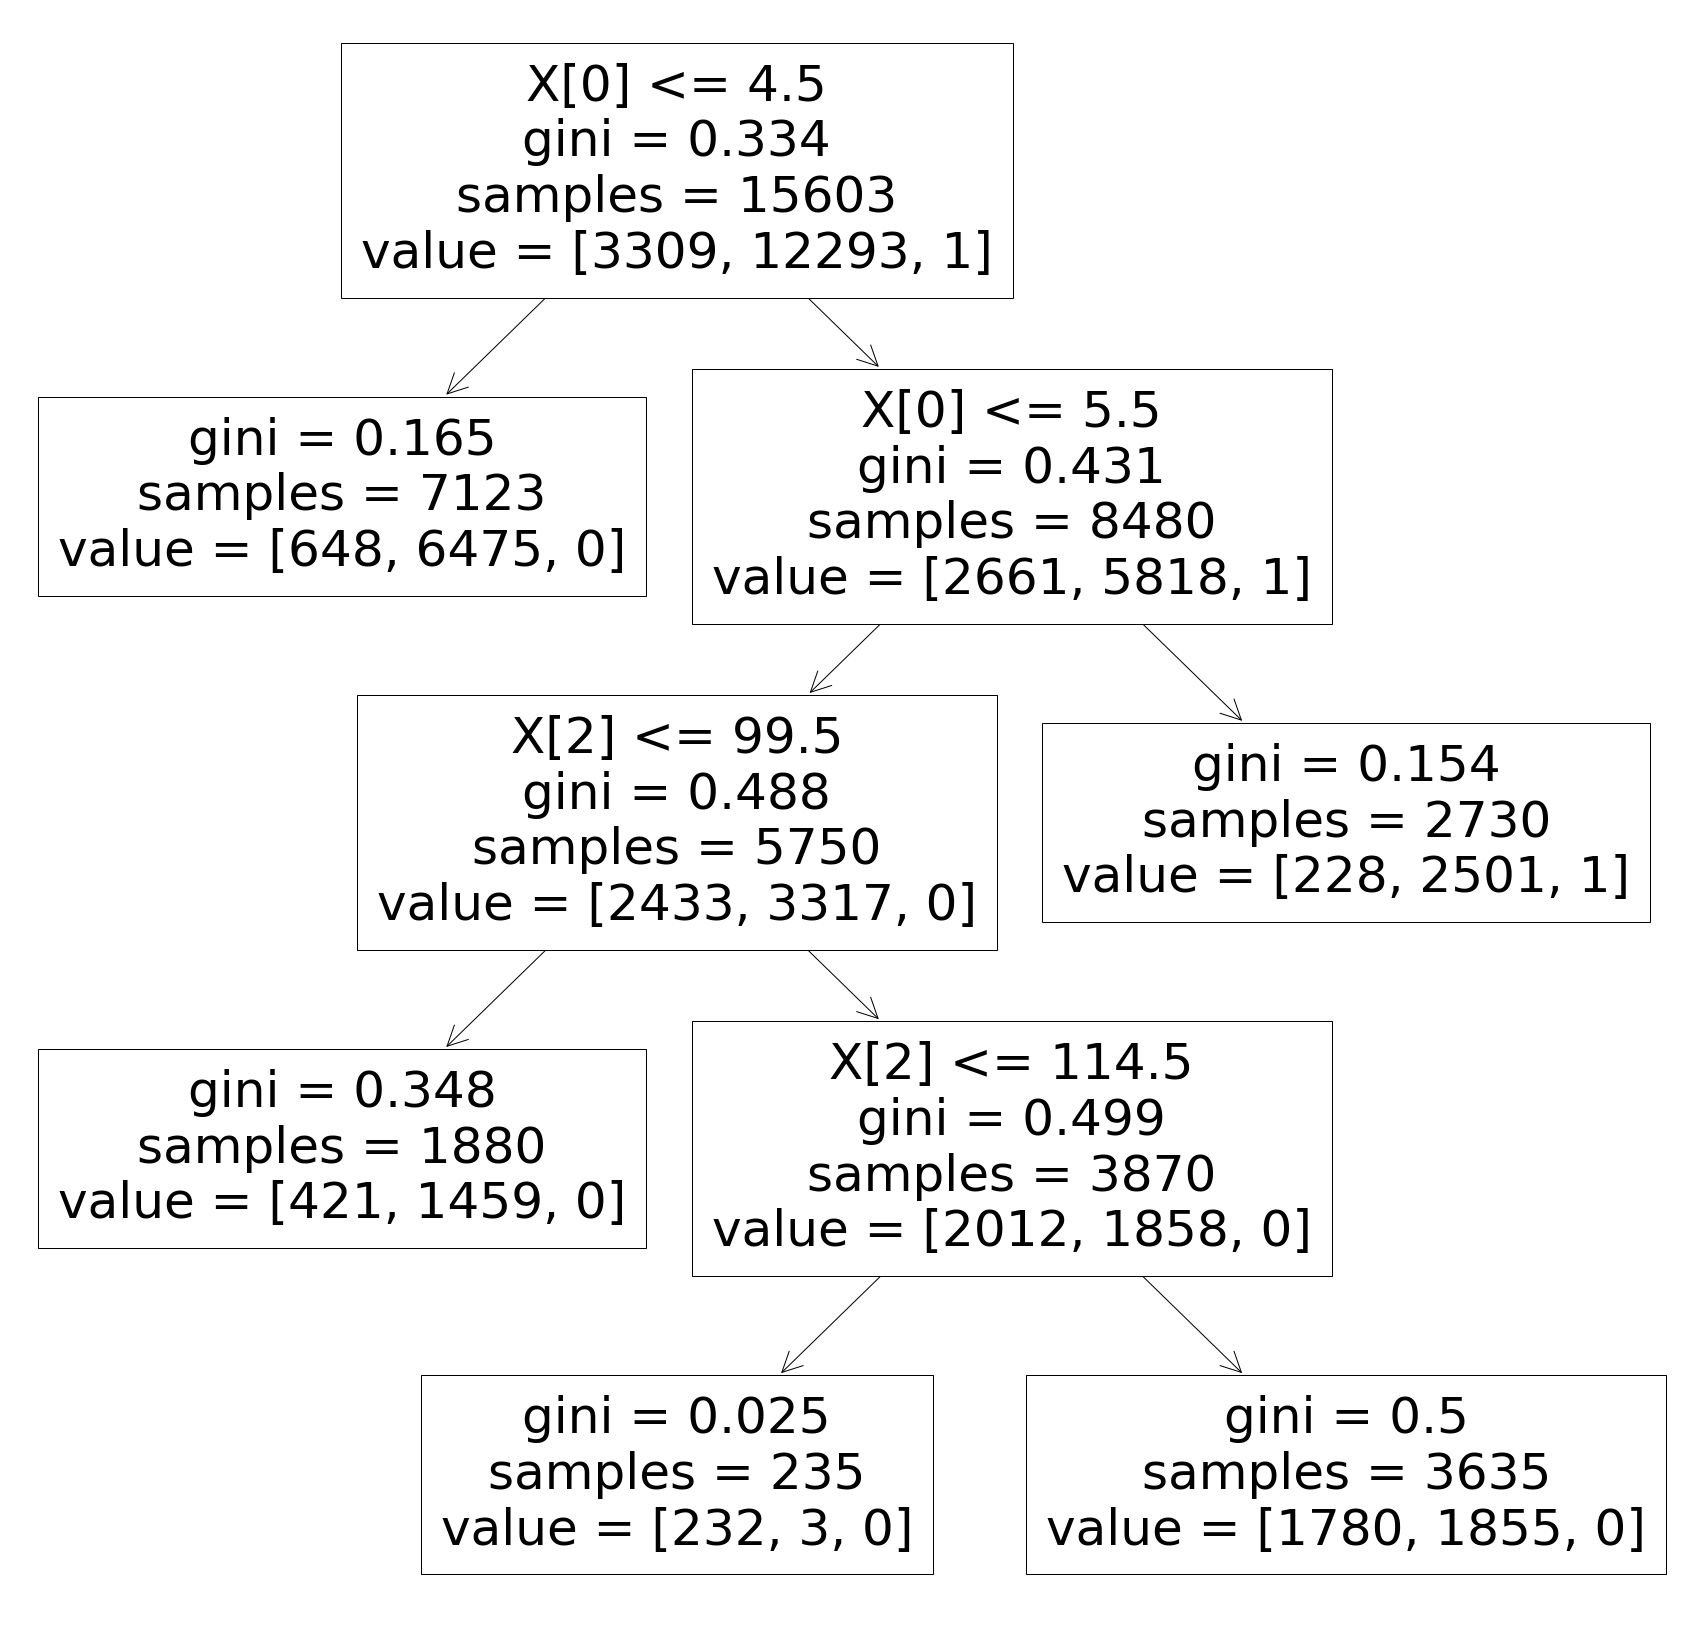

In [576]:
#creates a visual of the decision tree. Need a better visual
plt.figure(figsize=(30,30))


from sklearn import tree

tree.plot_tree(dataset_gini.fit(X_train, y_train))

In [540]:
from sklearn.tree import export_text
r = export_text(dataset_gini, feature_names= ['length', 'position', 'layer information'])
print(r)

|--- length <= 4.50
|   |--- class: 1
|--- length >  4.50
|   |--- length <= 5.50
|   |   |--- layer information <= 99.50
|   |   |   |--- class: 1
|   |   |--- layer information >  99.50
|   |   |   |--- layer information <= 114.50
|   |   |   |   |--- class: 0
|   |   |   |--- layer information >  114.50
|   |   |   |   |--- class: 1
|   |--- length >  5.50
|   |   |--- class: 1



In [541]:
#import graphviz
#from sklearn.tree import export_graphviz

#dot_data = tree.export_graphviz
#dot_data = tree.#
#export_graphviz(dataset_gini, out_file='tree.dot', 
                              # feature_names= ['length', 'position', 'layer information'], 
                              # class_names=['result'], filled=True, rounded=True,
                              # special_characters=True)
# Convert to png using system command (requires Graphviz)
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
#from IPython.display import Image
#Image(filename = 'tree.png')
#graph = graphviz.Source(dot_data)

#graph

In [542]:
#this is the entropy version. The decision tree classifier is using entropy instead of gini
dataset_en = DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_split=2, min_samples_leaf=1,
                                      max_depth=None,max_features=3,
                                      min_impurity_decrease=0.0, 
                                      max_leaf_nodes=10
                                      , min_weight_fraction_leaf=0.0, class_weight=None,ccp_alpha=0.0,
                                      random_state=100)

#fits the dataset with entropy
dataset_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=3, max_leaf_nodes=10,
                       random_state=100)

In [554]:
#creates an entropy predicted variable
#y_en_train_predict = dataset_en.predict(X_train)
y_en_predict = dataset_en.predict(X_test)
from sklearn.metrics import accuracy_score

#prints out the model accuracy with the entropy
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_en_predict)))



Model accuracy score with criterion entropy: 0.8226
Model training accuracy score with criterion entropy: 0.8198


In [558]:
#creates variables for entropy prediction from the training set
y_train_en_predict = dataset_en.predict(X_train)

y_train_en_predict

array(['1', '1', '1', ..., '0', '1', '1'], dtype=object)

In [559]:
#Prints the training set entropy accuracy
print('Training set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_train_en_predict)))

Training set accuracy score: 0.8198


In [560]:
#allows you to compare the sets for over and under fitting
print('training set score: {:.4f}'.format(dataset_en.score(X_train, y_train)))

print('test set score: {:.4f}'.format(dataset_en.score(X_test, y_test)))


training set score: 0.8198
test set score: 0.8226


[Text(0.375, 0.9166666666666666, 'X[0] <= 4.5\nentropy = 0.746\nsamples = 15603\nvalue = [3309, 12293, 1]'),
 Text(0.14285714285714285, 0.75, 'X[0] <= 2.5\nentropy = 0.44\nsamples = 7123\nvalue = [648, 6475, 0]'),
 Text(0.07142857142857142, 0.5833333333333334, 'entropy = 0.157\nsamples = 2152\nvalue = [49, 2103, 0]'),
 Text(0.21428571428571427, 0.5833333333333334, 'entropy = 0.531\nsamples = 4971\nvalue = [599, 4372, 0]'),
 Text(0.6071428571428571, 0.75, 'X[0] <= 5.5\nentropy = 0.899\nsamples = 8480\nvalue = [2661, 5818, 1]'),
 Text(0.35714285714285715, 0.5833333333333334, 'X[2] <= 99.5\nentropy = 0.983\nsamples = 5750\nvalue = [2433, 3317, 0]'),
 Text(0.21428571428571427, 0.4166666666666667, 'X[2] <= 18.5\nentropy = 0.767\nsamples = 1880\nvalue = [421, 1459, 0]'),
 Text(0.14285714285714285, 0.25, 'entropy = 0.978\nsamples = 194\nvalue = [114, 80, 0]'),
 Text(0.2857142857142857, 0.25, 'entropy = 0.685\nsamples = 1686\nvalue = [307, 1379, 0]'),
 Text(0.5, 0.4166666666666667, 'X[2] <= 11

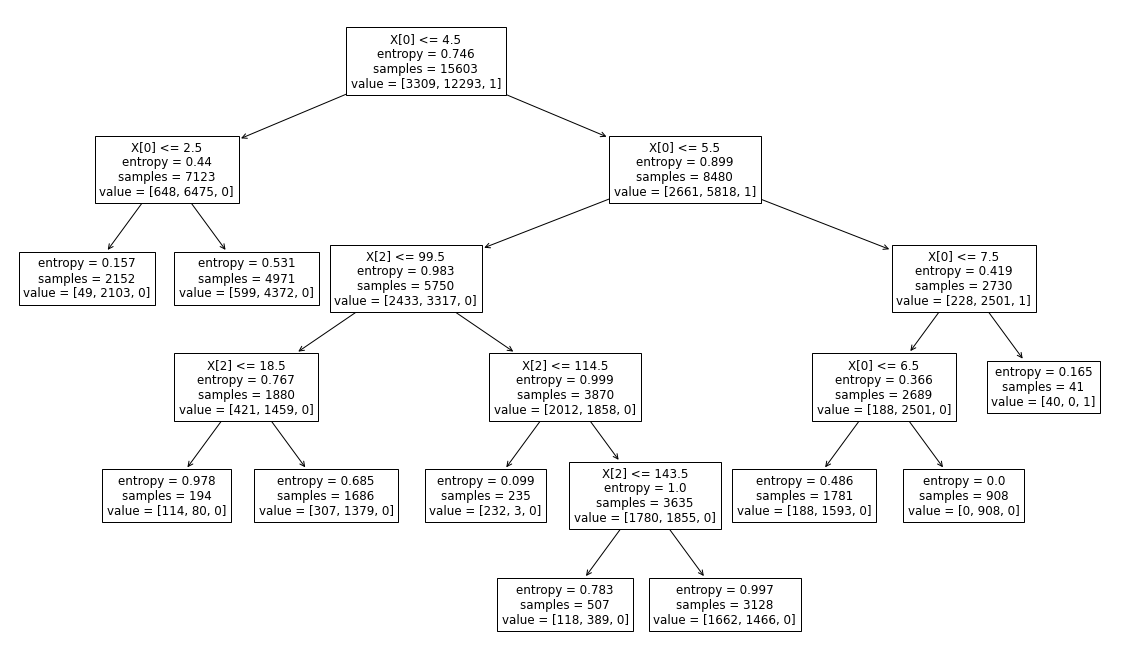

In [561]:
#creates a visual. still need a better one 
plt.figure(figsize=(20,12))

from sklearn import tree

tree.plot_tree(dataset_en.fit(X_train, y_train))

In [562]:
r = export_text(dataset_en, feature_names= ['length', 'position', 'layer information'])
print(r)

|--- length <= 4.50
|   |--- length <= 2.50
|   |   |--- class: 1
|   |--- length >  2.50
|   |   |--- class: 1
|--- length >  4.50
|   |--- length <= 5.50
|   |   |--- layer information <= 99.50
|   |   |   |--- layer information <= 18.50
|   |   |   |   |--- class: 0
|   |   |   |--- layer information >  18.50
|   |   |   |   |--- class: 1
|   |   |--- layer information >  99.50
|   |   |   |--- layer information <= 114.50
|   |   |   |   |--- class: 0
|   |   |   |--- layer information >  114.50
|   |   |   |   |--- layer information <= 143.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- layer information >  143.50
|   |   |   |   |   |--- class: 0
|   |--- length >  5.50
|   |   |--- length <= 7.50
|   |   |   |--- length <= 6.50
|   |   |   |   |--- class: 1
|   |   |   |--- length >  6.50
|   |   |   |   |--- class: 1
|   |   |--- length >  7.50
|   |   |   |--- class: 0



In [570]:
from sklearn.metrics import confusion_matrix
trainmat = confusion_matrix(y_train, y_train_en_predict)


#prints the confusion matrix
print('Training Set Confusion matrix\n\n', trainmat)


Training Confusion matrix

 [[ 2048  1261     0]
 [ 1549 10744     0]
 [    1     0     0]]


In [571]:
#creates a confusion matrix
from sklearn.metrics import confusion_matrix

cmat = confusion_matrix( y_test, y_en_predict)


#prints the confusion matrix
print('Testing Set Confusion matrix\n\n', cmat)


Testing Confusion matrix

 [[ 481  303]
 [ 389 2728]]


In [572]:
from sklearn.metrics import classification_report

#Prints a classification report
print(classification_report(y_test, y_en_predict))

              precision    recall  f1-score   support

           0       0.55      0.61      0.58       784
           1       0.90      0.88      0.89      3117

    accuracy                           0.82      3901
   macro avg       0.73      0.74      0.73      3901
weighted avg       0.83      0.82      0.83      3901



In [573]:
from sklearn.metrics import classification_report

#Prints a classification report
print(classification_report(y_train, y_train_en_predict))

C:\Users\oracl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oracl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.57      0.62      0.59      3309
           1       0.89      0.87      0.88     12293
      result       0.00      0.00      0.00         1

    accuracy                           0.82     15603
   macro avg       0.49      0.50      0.49     15603
weighted avg       0.83      0.82      0.82     15603



C:\Users\oracl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
